# Solution Graded Exercise 8: Hopfield Network model of associative memory

first name: Eve

last name: Rahbé

sciper: 235549

date: 23.04.18

*Your teammate*

first name of your teammate: Antoine

last name of your teammate: Alleon

sciper of your teammate: 223333


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex8_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html

## \* \* \* \* Programming Notes : Copying and slicing lists and numpy arrays \* \* \* \*
We would like to take the opportunity to bring to your attention certain features of Python, that might lead to unwanted behaviour and serious mistakes, if one is not aware of them. 
Please check the Python Cheat Sheet file on the moodle (https://moodle.epfl.ch/mod/page/view.php?id=981134 Part 4 of the ipynb file) for some examples of the following notes:

* Assigning a list to a new variable does not create a copy of the list, but creates a variable that points to the list. This means that modifying the second variable, also modifies the original list.
* Assigning a slice of a list to a new variable, creates a copy of the list. Any modification to the sliced list does not modify the original.

Now when it comes to numpy arrays:
* Assigning a numpy array to a new variable does not create a copy of the array, but creates a variable that points to the array. This means that modifying the second variable, also modifies the original array. (same as above)
* Assigning a slice of a numpy array to a new variable creates a variable that points to the corresponding elements of the original array as well! (contrary to what we saw above!) This means that modifying the second variable, also modifies the original array!
* To copy the original array and ensure that it is not modified by any modification of its copied version, the method copy() should be used.

# Exercise 8.1. Getting started

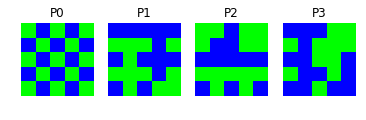

C:\Users\nicol\Miniconda2\envs\biomodel\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


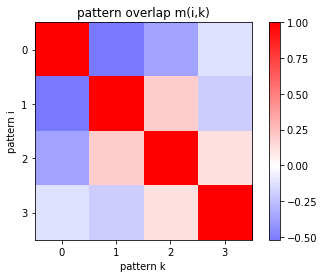

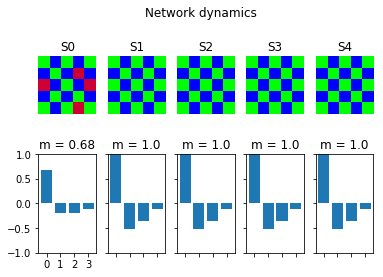

In [1]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


# 8.3. Exercise: N=4x4 Hopfield-network
## 8.3.1. Question: Storing a single pattern
#### [2 + 2 + 3 points]

In [2]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools

# 16 neurons
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
# noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=5)
# noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=9)
hopfield_net.set_state_from_pattern(noisy_init_state)

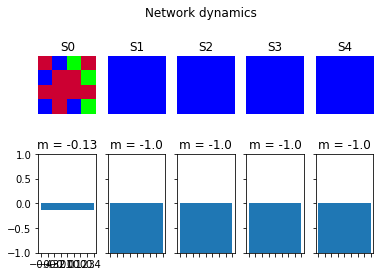

In [3]:
# Plot the sequence of network states along with the overlap of network state with the checkerboard

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Now test whether the network can still retrieve the pattern if we increase the number of flipped pixels. What happens at nr_flipped_pixels = 8, what if nr_flipped_pixels > 8 ?

For nr_of_flips = 8, the network cannot retrieve the initial pattern because at each iteration the value of each pixel flips sign. For nr_of_flips > 8, the network cannot retrieve the initial pattern and instead converge to a pattern with -1 sign for every pixel.

## 8.3.2. Question: the weights matrix
#### [1 + 3 + 2 points]

'\n5. Weight values : 0 (for wii), 1/16 (for pixels of the same sign) and -1/16 (for pixels of different sign)\n'

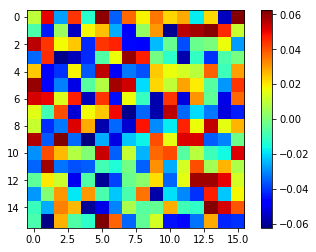

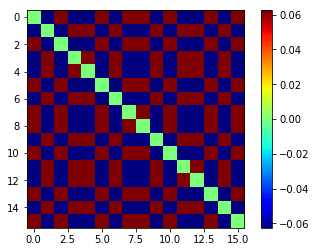

In [4]:
# Bullet points 1-5 

pattern_size = 4
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
'''
2. Size of the network : 4x4
   Size of the weight matrix : 16x16
'''
# plot weight matrix
plot_tools.plot_nework_weights(hopfield_net)

# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# plot weight matrix
plot_tools.plot_nework_weights(hopfield_net)

'''
5. Weight values : 0 (for wii), 1/16 (for pixels of the same sign) and -1/16 (for pixels of different sign)
'''

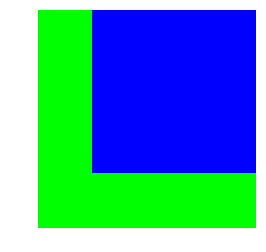

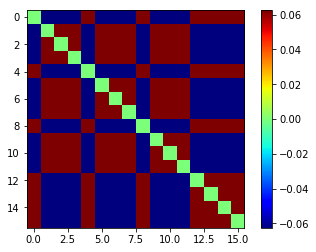

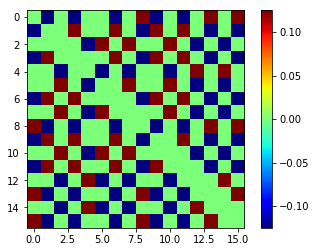

In [5]:
# Bullet points 6-11

# new 4x4 network
pattern_size = 4
# create an instance of the class HopfieldNetwork
hopfield_net_2 = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

# create a L pattern and add it to the pattern list
L_pattern = factory.create_L_pattern()
pattern_list_2 = [L_pattern]

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_2.store_patterns(pattern_list_2)

# plot pattern
plot_tools.plot_pattern(L_pattern)

# plot weight matrix
plot_tools.plot_nework_weights(hopfield_net_2)

'''
8. Weight values : 0 (for wii), 1/16 (for pixels of the same sign) and -1/16 (for pixels of different sign)
'''

# create an instance of the class HopfieldNetwork
hopfield_net_3 = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

# create a L pattern and a checkerboard pattern and add it to the pattern list
pattern_list_3 = [factory.create_L_pattern(), factory.create_checkerboard()]

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_3.store_patterns(pattern_list_3)

# plot weight matrix
plot_tools.plot_nework_weights(hopfield_net_3)

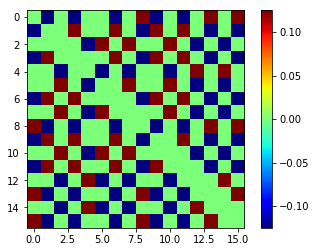

In [6]:
hopfield_net_sum = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_sum.weights = (hopfield_net.weights + hopfield_net_2.weights)
plot_tools.plot_nework_weights(hopfield_net_sum)

How does this matrix compare to the two previous matrices?

The weight matrix is the sum of weights of both the L-shaped and the checkerboard networks.

## 8.3.3. Question (optional): Weights Distribution

(array([  64.,    0.,    0.,    0.,    0.,  142.,    0.,    0.,    0.,   50.]),
 array([-0.125, -0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,
         0.075,  0.1  ,  0.125]),
 <a list of 10 Patch objects>)

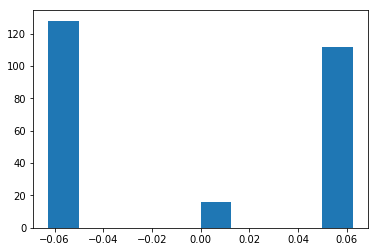

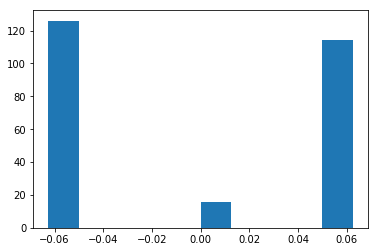

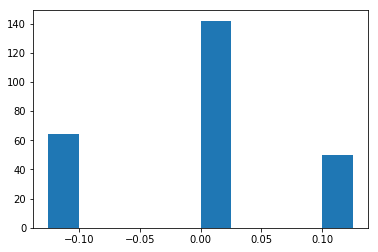

In [7]:
import matplotlib.pyplot as plt

# You can easily plot a histogram by adding the following two lines to your script. 
#It assumes you have stored your network in the variable ‘hopfield_net’.

plt.figure()
plt.hist(hopfield_net.weights.flatten())
plt.figure()
plt.hist(hopfield_net_2.weights.flatten())
plt.figure()
plt.hist(hopfield_net_3.weights.flatten())

In the last network, weights take values of 0 (0+0, -1/16 + 1/16, 1/16 - 1/16) and +/- 1/8 (+/- 1/16 +/- 1/16).

# 8.4. Exercise: Capacity of an N=100 Hopfield-network
## 8.4.1. Associative memory.
#### [2 points]

A Hopfield network implements so called associative or content-adressable memory. Explain what this means. (max 4 lines)


Associative or content-adressable memory is the capability of the network to recover the most resemblant stored pattern from a noisy input.

## 8.4.2. Capacity of the network.
#### [1 points]

Using the value $C_{store}$
 given in the book, how many patterns can you store in a N=10x10 network? Use this number K in the next question:


With the value $C_{store} = 0.105$, the maximal number of patterns that a network of $N = 100$ neurons can store is $M_{max} = N * C_{store} = 10.5$.

## 8.4.3. Checkerboard and random patterns.
#### [3 points]

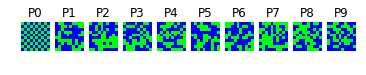

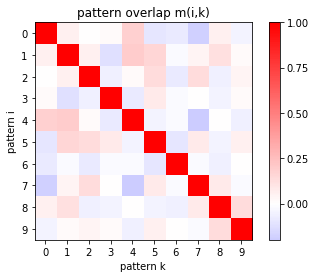

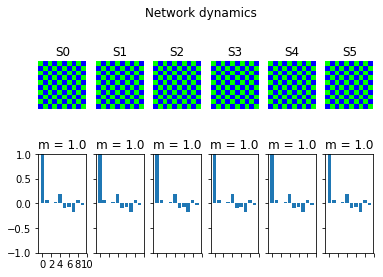

In [8]:
pattern_size = 10
m_max = 10.5

# create an instance of the class HopfieldNetwork
hopfield_net_100 = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add K-1 random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=int(m_max-1), on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_100.store_patterns(pattern_list)

# initialize the network with unchanged checkerboard
hopfield_net_100.set_state_from_pattern(checkerboard)

# from this initial state, let the network dynamics evolve.
states = hopfield_net_100.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Rerun your script a few times. What do you observe? 
#### [2 points]

When running the script several times, we observe that the network retrieves the pattern at the first iteration as it was initialized with the unchanged checkerboard itself (which is one of the stored pattern). This pattern is indeed the most resemblant to itself.

# 8.5. Exercise: Non-random patterns
## 8.5.1. Alphabet.

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10L, 10L). Create a network of corresponding size


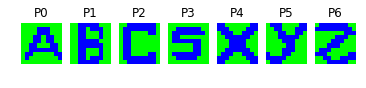

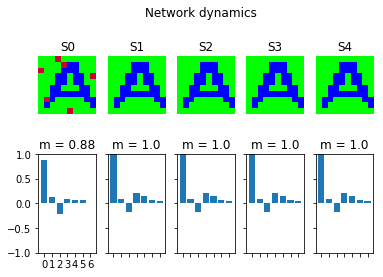

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
import numpy

# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

## 8.5.2. Add a letter.
#### [2 points]

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10L, 10L). Create a network of corresponding size


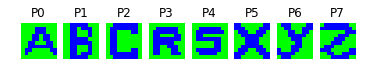

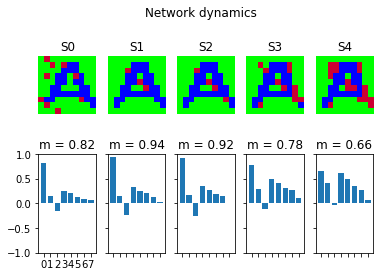

In [10]:
# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'R', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# # create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Is the pattern ‘A’ still a fixed point? 
Does the overlap between the network state and the reference pattern ‘A’ always decrease? (max 3 lines)
#### [3 points]

The pattern 'A' is not a fixed point anymore. Indeed the letter 'R' is very resemblant to the input pattern. The overlap between the network state and the reference pattern 'A' increases at the first iteration and decreases for all other iterations. Moreover the overlap between the network state and the reference pattern 'R' increases from the first iteration.

## 8.5.3. Capacity.
#### [3 points]

#### Make a guess of how many letters the network can store. Then create a (small) set of letters. Check if all letters of your list are fixed points under the network dynamics. Explain the discrepancy between the network capacity C (computed above) and your observation.



the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10L, 10L). Create a network of corresponding size


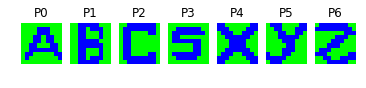

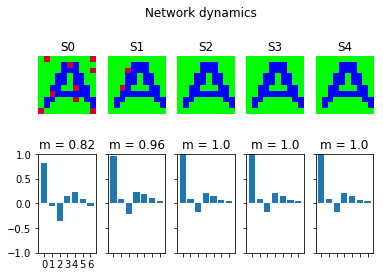

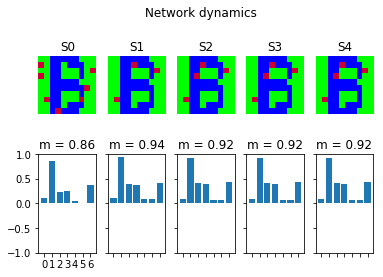

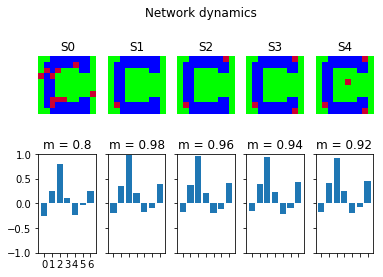

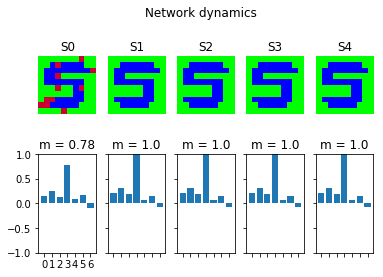

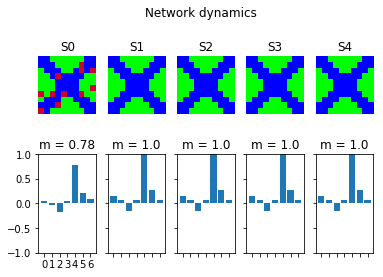

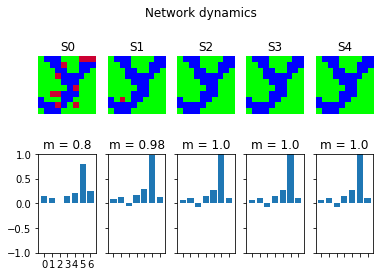

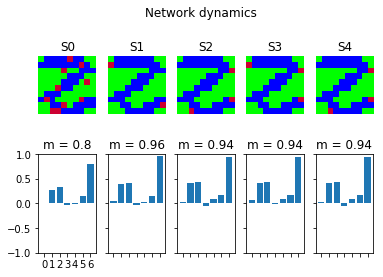

In [11]:
# the letters we want to store in the hopfield network
#letter_list = ['A', 'B', 'C', 'D', 'R', 'S', 'W', 'X', 'Y', 'Z']
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']
#letter_list = ['A', 'B', 'C', 'D', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
# numpy.random.seed(123)

abc_dictionary =pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list ]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

for i in range(len(letter_list)):

    # # create a noisy version of a pattern and use that to initialize the network
    noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary[letter_list[i]], noise_level=0.2)
    hopfield_net.set_state_from_pattern(noisy_init_state)

    # from this initial state, let the network dynamics evolve.
    states = hopfield_net.run_with_monitoring(nr_steps=4)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

    # plot the states of the network
    plot_tools.plot_state_sequence_and_overlap(
        states_as_patterns, pattern_list, reference_idx=i, suptitle="Network dynamics")


Explain the discrepancy between the network capacity C (computed above) and your observation. (max 4 lines)
#### [3 points]

We observe a discrepancy between the maximal number of random patterns that a network can store, computed above with $C_{store}$, and the maximal number of letters the above network can retrieve. A network with $N=100$ is theoretically able to retrieve up to 10 stored patterns. But here the network with 10 stored letters is not able to retrieve most of them, due to the resemblance between them; while a network with 7 stored letters is able to retrieve most of them. 

# 8.6. Implementing different types of dynamics
### *** Note:*** this exercise is NOT a bonus and it is graded
## 8.6.1. Exercise:
Implement a Hopfield network with asynchronous dynamics (use the function set_dynamics_sign_async()). Store 5 random patterns (take inspiration from exercise 8.3). Fix a noisy initial state, run the network a few times and observe the performance over the different trials.

Parameters: network size=5x5, number of rnd patterns=5, on probability=0.5, number of flips=8.
#### [5 points]

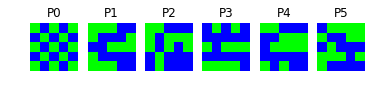

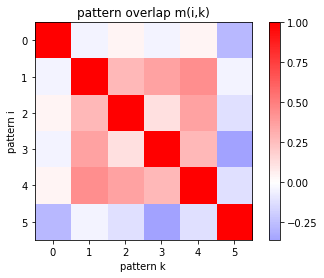

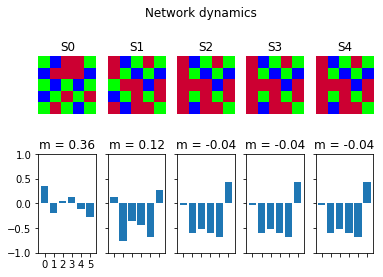

In [12]:
pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net_async = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_async.set_dynamics_sign_async()

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_async.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
if 'noisy_init_state_async' in locals():
    pass
else: 
    noisy_init_state_async = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net_async.set_state_from_pattern(noisy_init_state_async)

# from this initial state, let the network dynamics evolve.
states = hopfield_net_async.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Comment on your results (max 3 lines).
#### [3 points]

With the same initialization, the network outputs different patterns as the neuron indexing is different in the state updating function at each iteration. Therefore, the pattern will sometime converge to the checkerboard pattern and sometime to some other local minima pattern.

## 8.6.2. Stochastic neuron
Implement a synchronous and stochastic neuron. Use the function HopfieldNetwork.set_dynamics_to_user_function() in order to pass _get_sigmoid_update_function(), which you should implement. 

In the stochastic network the dynamics depend on the so-called inverse temperature $\beta$. The temperature in this system can be seen as noise. The activity $S_i(t+1)$ in the next time-step follows the probability distribution: 
\begin{equation}
P\left(S_i(t+1)=1\right) = \frac1{1+\exp\left[-h_i(t)\beta\right]} \qquad \textrm{ where } \qquad h_i(t) = \sum_j w_{ij} S_j(t)
\end{equation}
That is, it is more likely for a neuron $i$ to be set to +1 if its input $h_i$ is higher.

Parameters: network size = 5x5, number of rnd patterns = 5, on probability = 0.5, number of flips = 8, $\beta$=10.

*** Hint 1: *** For inspiration check out the source code of the function _get_sign_update_function()

*** Hint 2: *** In order to implement stochasticity, we suggest to use the python-library numpy.random.

#### [7 points]

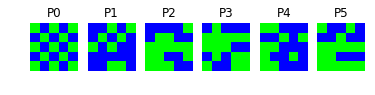

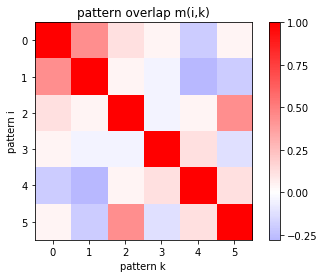

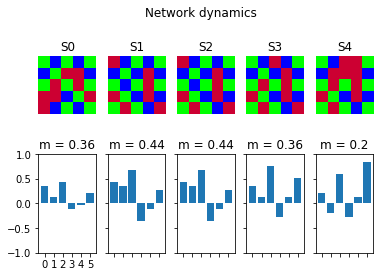

In [13]:
import numpy as np

# Synchronous stochastic update
def _get_sigmoid_update_function(beta):
    """
    for internal use

    Returns:
        A function implementing a synchronous state update using the sigmoid function (h)
    """
    def upd(state_s0, weights):
        h = np.sum(weights * state_s0, axis=1)
        p = 1/(1+np.exp(-h*beta))
        s1 = np.ones(p.shape)
        rand = np.random.uniform(0,1, p.shape)
        idx = p <= rand
        s1[idx] = -1
        
        return s1
    return upd

beta = 10
pattern_size = 5

hopfield_net_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_stoch.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=beta))

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_stoch.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network 
noisy_init_state_stoch = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net_stoch.set_state_from_pattern(noisy_init_state_stoch)

# from this initial state, let the network dynamics evolve.
states = hopfield_net_stoch.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

## 8.6.3 Finite temperature
Choose one of the stored patterns (let's say number 1) and flip 10 bits. Then plot the overlap between the network state and this pattern, $m^1$, over time for different values of $\beta$, $\beta\in \left[0.1,2,5,100\right]$.

Parameters: network size = 10x10, number of rnd patterns = 5, on probability = 0.5, number of flips = 10, number of trials = 100, number of steps = 9.

*** Hint 1:***  In order to plot $m^1$ over time, run the script several times and compute the mean  and the standard deviation $\sigma$ of the overlap $m^1$ over trials. You can use the function plt.fill and its parameter $\alpha$ (the transparency), in order to fill with color the area between $+\sigma$ and $-\sigma$.

*** Hint 2: *** Use the function pattern_tools.compute_overlap()

*** Hint 3:*** We suggest to implement and test your code with a smaller network size before getting to the 10x10 units network.
#### [7 points]

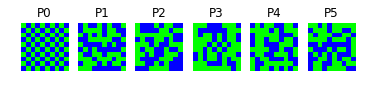

C:\Users\nicol\Miniconda2\envs\biomodel\lib\site-packages\matplotlib\mlab.py:1544: RuntimeWarning: divide by zero encountered in double_scalars
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)
C:\Users\nicol\Miniconda2\envs\biomodel\lib\site-packages\matplotlib\mlab.py:1544: RuntimeWarning: invalid value encountered in multiply
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)
C:\Users\nicol\Miniconda2\envs\biomodel\lib\site-packages\matplotlib\mlab.py:1544: RuntimeWarning: invalid value encountered in double_scalars
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)
C:\Users\nicol\Miniconda2\envs\biomodel\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: invalid value encountered in greater


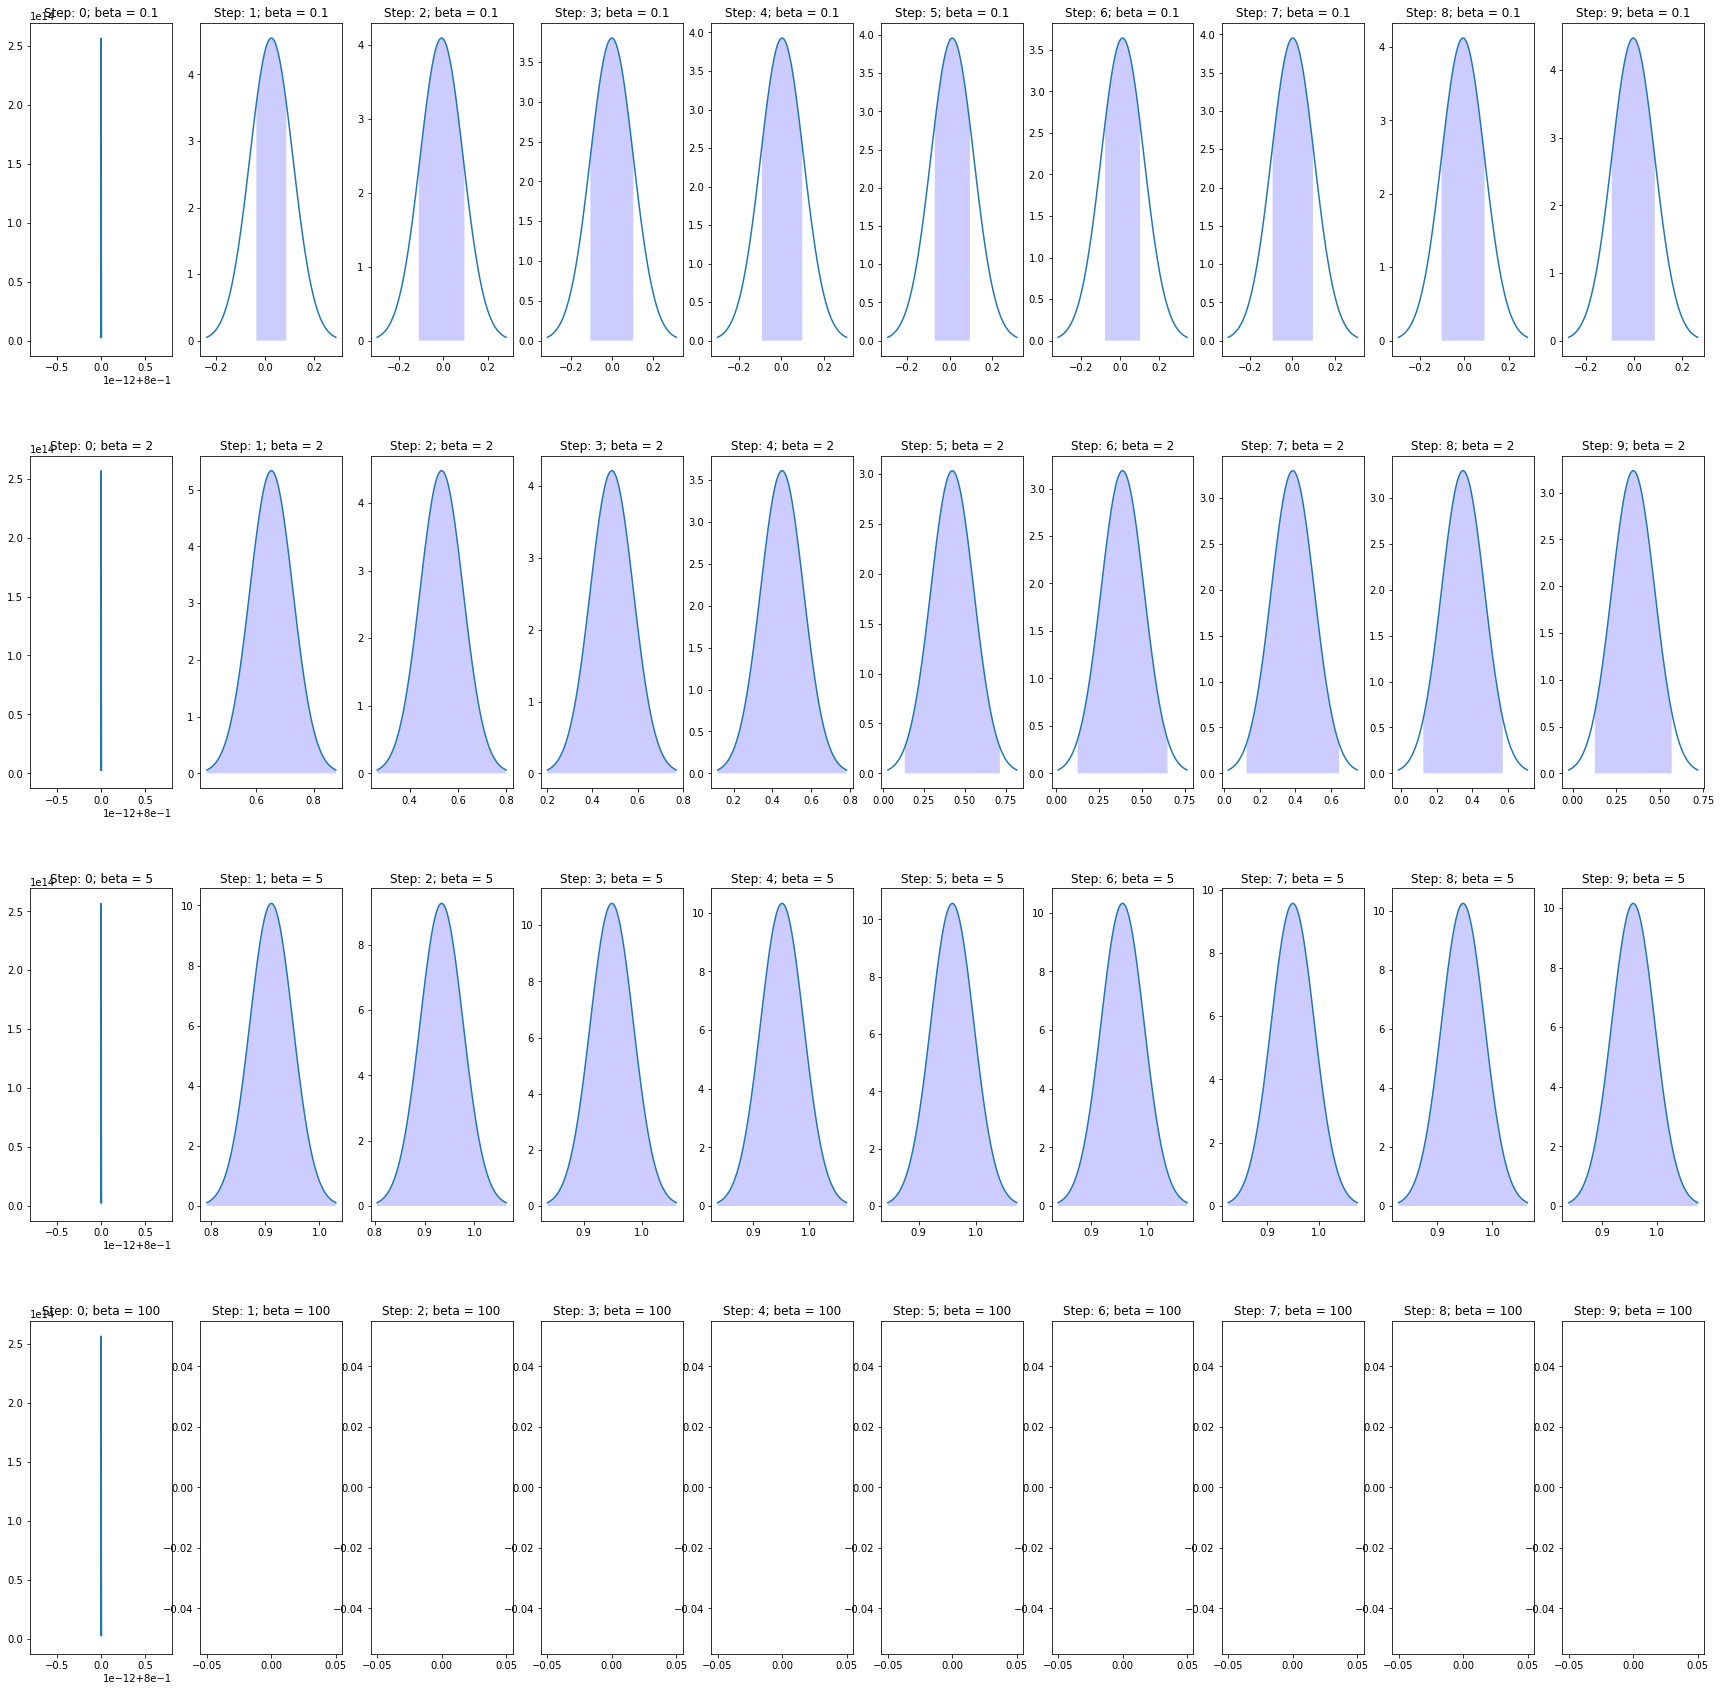

In [14]:
def compute_overlap_over_time(hopfield_net, pattern_list, init_state, nTrials, nr_steps, idx):
    """ For a given hopfield_net and a pattern_list, initialize it with the init_state and run it
    Compute its overlap with the pattern pattern_list[idx] in time (for nr_steps)
    Repeat the above over many trial (nTrials)
    """
    overlap = np.zeros((nTrials,nr_steps+1))
    
    for i in range(0,nTrials):
        
        # Learn 
        
        
        # run a synch and stoch Hopfield model with the same initial state
        hopfield_net.set_state_from_pattern(init_state)
        states = hopfield_net.run_with_monitoring(nr_steps)
        
        # let the network dynamics evolve
        states_as_patterns = factory.reshape_patterns(states)
        
        for i_step in range(len(states_as_patterns)):
            overlap[i,i_step] = pattern_tools.compute_overlap(states_as_patterns[i_step], pattern_list[idx])
    return overlap

import matplotlib.mlab as mlab
import numpy as np
# Create the patterns and store them

nTrials = 100
nr_steps= 9
betas = [0.1,2,5,100]
pattern_size = 10

# generate network
hopfield_net_temp = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# learn patterns
hopfield_net_temp.store_patterns(pattern_list)
# define initial state
init_state_temp = pattern_tools.flip_n(pattern_list[1], nr_of_flips=10)

overlap_mean = np.zeros((len(betas), nr_steps+1))
overlap_std = np.zeros((len(betas), nr_steps+1))

f, ax = plt.subplots(len(betas), nr_steps+1, figsize=(30,30))

for j in range(0, len(betas)):
    
    hopfield_net_temp.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=betas[j]))
    overlap = compute_overlap_over_time(hopfield_net_temp, pattern_list, init_state_temp, nTrials, nr_steps, 1)
    
    overlap_mean[j,:] = np.mean(overlap, 0)
    overlap_std[j,:] = np.std(overlap, 0)
    
    # Plot
    for k in range(nr_steps+1):
        #print(j,k)
        xx = np.linspace(overlap_mean[j,k] - 3*overlap_std[j,k], overlap_mean[j,k] + 3*overlap_std[j,k], 100)
        #xx = np.linspace(-2, 2, 100)
        yy = mlab.normpdf(xx, overlap_mean[j,k], overlap_std[j,k])
        threshold = mlab.normpdf(overlap_std[j,k], overlap_mean[j,k], overlap_std[j,k])
        ax[j,k].plot(xx, yy)
        ax[j,k].set_title('Step: '+str(k)+'; beta = '+str(betas[j]))
        ax[j,k].fill_between(xx, yy, where = yy > threshold, facecolor='blue', alpha=0.2)
f.subplots_adjust(hspace=0.3)
plt.show()
    

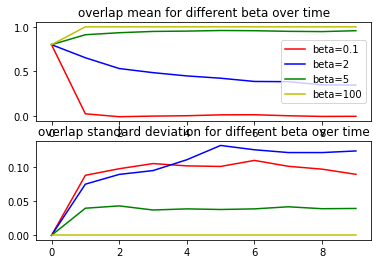

In [15]:
axes = plt.subplot(2,1,1)
plt.plot(np.arange(10), overlap_mean[0,:], color='r', label='beta=0.1')
plt.plot(np.arange(10), overlap_mean[1,:] , color='b', label='beta=2')
plt.plot(np.arange(10), overlap_mean[2,:], color='g', label='beta=5')
plt.plot(np.arange(10), overlap_mean[3,:], color='y', label='beta=100')
plt.title('overlap mean for different beta over time')
plt.legend(loc="center right")

axes = plt.subplot(2,1,2)
plt.plot(np.arange(10), overlap_std[0,:], color='r')
plt.plot(np.arange(10), overlap_std[1,:] , color='b')
plt.plot(np.arange(10), overlap_std[2,:], color='g')
plt.plot(np.arange(10), overlap_std[3,:], color='y')
plt.title('overlap standard deviation for different beta over time')

plt.show()

Comment on your plot (max 5 lines).
#### [5 points]

For small betas (0.1, 2), the mean overlap decreases from the initial value of 0.8 to 0 over time. The initial pattern does not converge towards the stored pattern used to initialize the network. The standard deviation increases as the network evolves probably because the initial pattern converges towards different patterns in each trial.
For larger betas (5, 100), the mean overlap increases quickly towards 1. This is because the network converges towards the stored pattern used to initialize the network. Using these betas, we observe smaller standard deviations because in almost all trials the network converges. For $\beta = 100$, the standard deviation is null after the first iteration as in all trials the network converges in 1 iteration.

## 8.6.4 Asynchronous stochastic neuron
Implement the stochastic neuron of exercise 8.6.2, but with asynchronous update.

*** Hint: *** For help check out the source code of the function _get_async_sign_update_function()
#### [4 points]

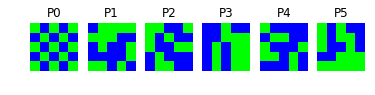

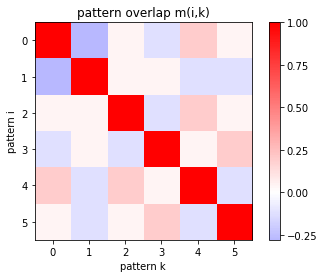

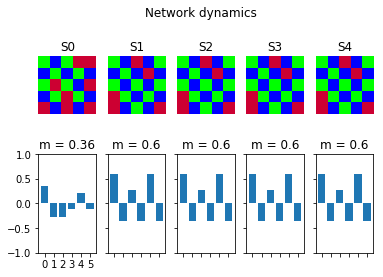

In [16]:
def _get_asynch_sigmoid_update_function(beta):
    """
    for internal use

    Returns:
        A function implementing a asynchronous state update using the sigmoid function
    """
    def upd(state_s0, weights):
        random_neuron_idx_list = np.random.permutation(len(state_s0))
        state_s1 = state_s0.copy()
        
        for i in range(len(random_neuron_idx_list)):
            rand_neuron_i = random_neuron_idx_list[i]
            h_i = np.dot(weights[:, rand_neuron_i], state_s1)
            p_i = 1/(1+np.exp(-h_i*beta)) 
            if(p_i < np.random.uniform(0,1)):
                state_s1[rand_neuron_i] = -1
            else:
                state_s1[rand_neuron_i] = 1          
        return state_s1
    return upd

beta = 10
pattern_size = 5

hopfield_net_asynch_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_asynch_stoch.set_dynamics_to_user_function(_get_asynch_sigmoid_update_function(beta=beta))

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_asynch_stoch.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
if 'noisy_init_state_async_stoch' in locals():
    pass
else: 
    noisy_init_state_async_stoch = pattern_tools.flip_n(checkerboard, nr_of_flips=8)
hopfield_net_asynch_stoch.set_state_from_pattern(noisy_init_state_async_stoch)

# from this initial state, let the network dynamics evolve.
states = hopfield_net_asynch_stoch.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

# 8.7 Energy 

## 8.7.1 Exercise
Set up a deterministic and asynchronous Hopfield network and store 3 random patterns. 

The energy can be defined as $E=-\sum_i^N \sum_j^N w_{ij} S_i S_j$. 

Implement a function that calculates the energy according to the above definition. 

Parameters: network size = 10x10, number of rnd patterns = 3, on probability = 0.5.

#### [4 points]

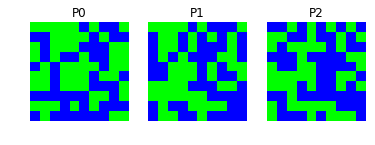

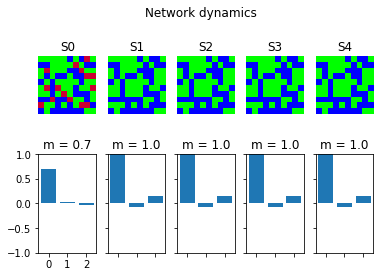

-46.2
-99.6
-99.6
-99.6
-99.6


In [17]:
# Set up your network
pattern_size = 10

# create an instance of the class HopfieldNetwork
hopfield_net_energy = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_energy.set_dynamics_sign_async()

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
pattern_list_energy = []

# add random patterns to the list
pattern_list_energy.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list_energy)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_energy.store_patterns(pattern_list_energy)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state_energy = pattern_tools.flip_n(pattern_list_energy[0], nr_of_flips=15)
hopfield_net_energy.set_state_from_pattern(noisy_init_state_energy)

# from this initial state, let the network dynamics evolve.
states = hopfield_net_energy.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list_energy, reference_idx=0, suptitle="Network dynamics")

def energy(weight, state, pattern_size):
    E=0
    for i in range(pattern_size*pattern_size):
        for j in range(pattern_size*pattern_size):
            E+=weight[i,j]*state[i]*state[j]
    return -E

for i in range(5):
    print(energy(hopfield_net_energy.weights,states[i],pattern_size))

## 8.7.2 Exercise
Compute the energy of one of the stored patterns: $E (\xi^{\mu})$.

Choose one pattern and gradually flip more and more bits. For that you need to implement a function flip_idx, after checking out the function pattern_tools.flip_n(). How does the energy change and why? (max 3 lines)

*** Hint: *** You can get an intuition by plotting the energy of the state as a function of the number of flipped bits.
#### [1 + 6 + 4 points]

energy of second stored pattern : -98.64


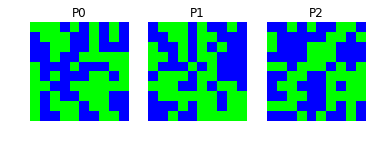

100
99
98
97
96
95
94
93
92
91


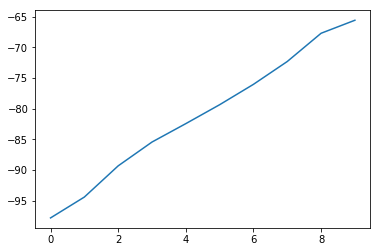

In [18]:
Energy_p2 = energy(hopfield_net_energy.weights,pattern_list_energy[1].flatten(), pattern_size)
print("energy of second stored pattern : {}".format(Energy_p2))

import random

nr_flips = np.arange(0,10,1)
energy_flips = np.zeros(len(nr_flips))

# Set up your network
pattern_size = 10

# create an instance of the class HopfieldNetwork
hopfield_net_energy_flipped_bits = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_energy_flipped_bits.set_dynamics_sign_async()

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
pattern_list_energy_flipped_bits = []

# add random patterns to the list
pattern_list_energy_flipped_bits.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list_energy_flipped_bits)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_energy_flipped_bits.store_patterns(pattern_list_energy_flipped_bits)

def flip_idx(template, idx):
        """
        makes a copy of the template pattern and flips selected states in idx.
        Args:
            template:
            idx:
        Returns:
            a new pattern
        """
        linear_template = template.flatten()
        linear_template[idx] = -linear_template[idx]
        return linear_template.reshape(template.shape)

for i in range(len(nr_flips)):
    idx_flips = np.zeros(100)
    ind = range(0,100)
    for j in range(i):
        k = random.choice(ind)
        idx_flips[k] = 1
        ind.remove(k)
    print (len(ind))
    # define initial pattern using flip_idx
    my_init_state = flip_idx(pattern_list_energy_flipped_bits[0], ind)
    hopfield_net_energy_flipped_bits.set_state_from_pattern(my_init_state)
    # from this initial state, let the network dynamics evolve.
    states_flipped_bits = hopfield_net_energy_flipped_bits.run_with_monitoring(nr_steps=4)
    
    # calculate the energy of network
    energy_flips[i] = energy(hopfield_net_energy_flipped_bits.weights,states_flipped_bits[0], pattern_size)
    
#Plot
plt.plot(nr_flips, energy_flips)    


As the number of flipped bits increases, the energy linearly increases too. The energy can be seen as a function minimized by the network from the initial pattern. This function has local minima at stored patterns and other spurious patterns. As we increase the number of flipped bits, we move away from a local minimum and the energy increases.

## 8.7.3 Question.
Compute the energy of the reverse of one of the stored patterns $E(-\xi^1)$. What do you observe, what are the consequences on the dynamics of the system and why? (max 3 lines) 
#### [1 + 3 points]

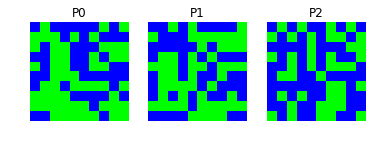

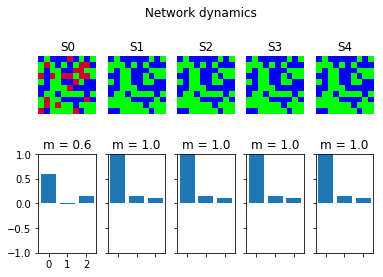

initial state energy : -35.0
flipped initial state energy : -35.0


In [19]:
# Set up your network
pattern_size = 10

# create an instance of the class HopfieldNetwork
hopfield_net_energy_flipped = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_energy_flipped.set_dynamics_sign_async()

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
pattern_list_energy_flipped = []

# add random patterns to the list
pattern_list_energy_flipped.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list_energy_flipped)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_energy_flipped.store_patterns(pattern_list_energy_flipped)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state_energy_flipped = pattern_tools.flip_n(pattern_list_energy_flipped[0], nr_of_flips=20)

# initialize network state
hopfield_net_energy_flipped.set_state_from_pattern(noisy_init_state_energy_flipped)

# from this initial state, let the network dynamics evolve.
states_flipped = hopfield_net_energy_flipped.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states_flipped)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list_energy_flipped, reference_idx=0, suptitle="Network dynamics")

print("initial state energy : {}".format(energy(hopfield_net_energy_flipped.weights,states_flipped[0], pattern_size)))
print("flipped initial state energy : {}".format(energy(hopfield_net_energy_flipped.weights,-states_flipped[0], pattern_size)))

We observe that the energy of the initial state and the one of the flipped initial state are the same. Indeed, the pixel values of one state are just the opposite of the other and the energy will thus be the same by definition :
$-\sum_i^N \sum_j^N w_{ij} (-S_i) (-S_j) = -\sum_i^N \sum_j^N w_{ij} S_i S_j = E$.

## 8.7.4 Exercise.
1 - Initialize the network with the state $S_0 = sgn(\sum_{\mu}^3 \xi^{\mu})$ and run the dynamics. What is the energy of this state?

Parameters: number steps = 4.

#### [2 points]

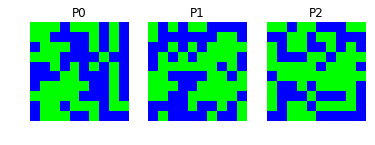

Summed pattern : 


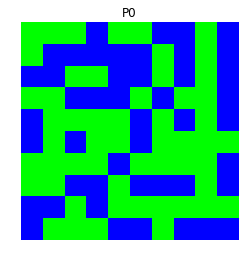

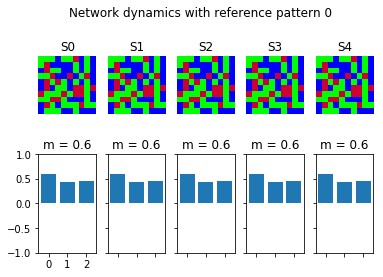

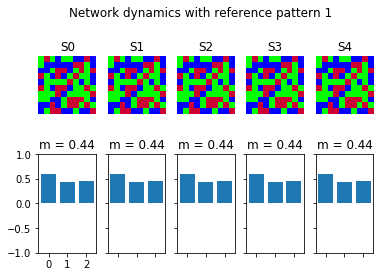

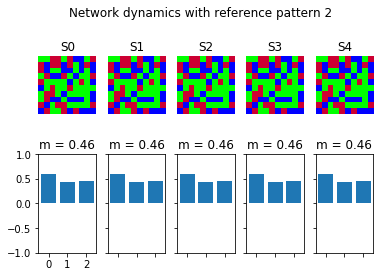

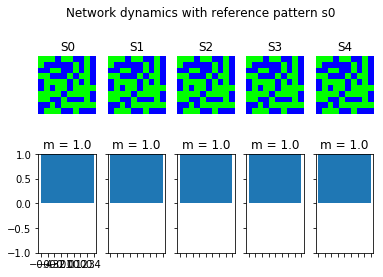

The summed state energy is -73.52
The first state energy is -97.52
The second state energy is -98.16
The third state energy is -98.36


In [20]:
# Set up your network
pattern_size = 10

# create an instance of the class HopfieldNetwork
hopfield_net_energy_sum = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_energy_sum.set_dynamics_sign_async()

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
pattern_list_energy_sum = []

# add random patterns to the list
pattern_list_energy_sum.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list_energy_sum)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_energy_sum.store_patterns(pattern_list_energy_sum)

# create initial state (sign of sum of patterns)
summed_initial_state = np.sign(pattern_list_energy_sum[0]+pattern_list_energy_sum[1]+pattern_list_energy_sum[2])
print('Summed pattern : ')
plot_tools.plot_pattern_list([summed_initial_state])

# initialize network state
hopfield_net_energy_sum.set_state_from_pattern(summed_initial_state)

# from this initial state, let the network dynamics evolve.
states_sum = hopfield_net_energy_sum.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states_sum)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list_energy_sum, reference_idx=0, suptitle="Network dynamics with reference pattern {}".format(0))
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list_energy_sum, reference_idx=1, suptitle="Network dynamics with reference pattern {}".format(1))
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list_energy_sum, reference_idx=2, suptitle="Network dynamics with reference pattern {}".format(2))
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, [summed_initial_state], reference_idx=0, suptitle="Network dynamics with reference pattern s0")

print("The summed state energy is {}".format(energy(hopfield_net_energy_sum.weights, states_sum[0], pattern_size)))
print("The first state energy is {}".format(energy(hopfield_net_energy_sum.weights, pattern_list_energy_sum[0].flatten(), pattern_size)))
print("The second state energy is {}".format(energy(hopfield_net_energy_sum.weights, pattern_list_energy_sum[1].flatten(), pattern_size)))
print("The third state energy is {}".format(energy(hopfield_net_energy_sum.weights, pattern_list_energy_sum[2].flatten(), pattern_size)))

2 - Consider the ensemble of all states that differ from $S_0$ in exactly one flip. Initialize the network in each of those states and check what is the final state of the dynamical evolution.

*** Hint: *** Compare the final states with $S_0$.
#### [8 points]

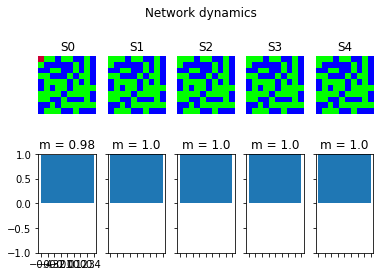

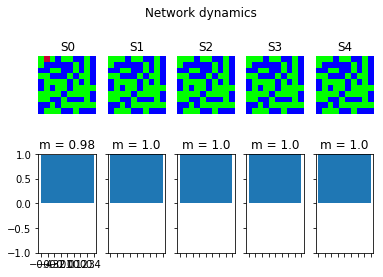

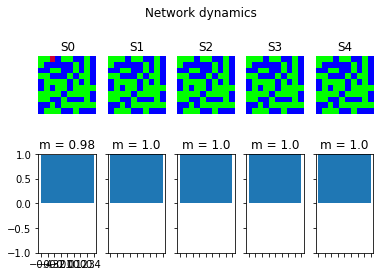

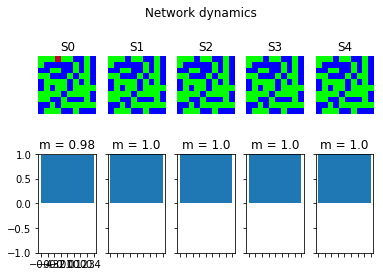

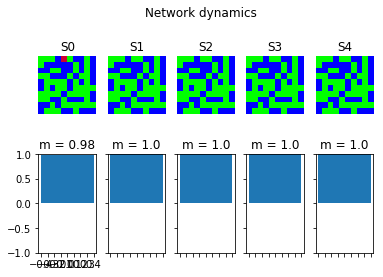

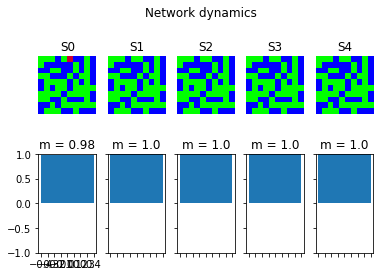

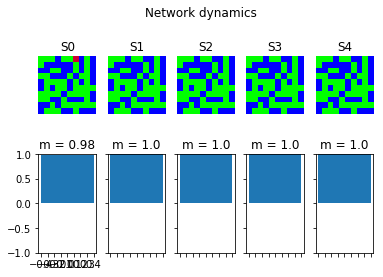

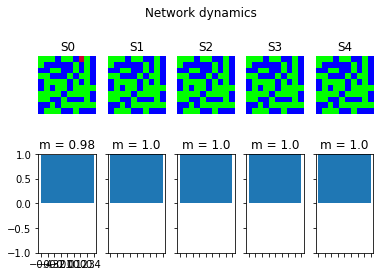

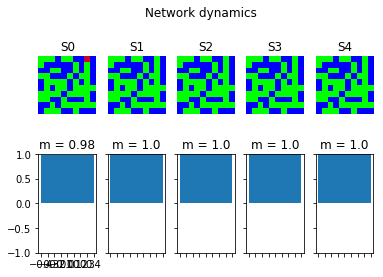

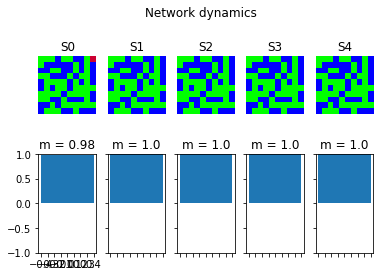

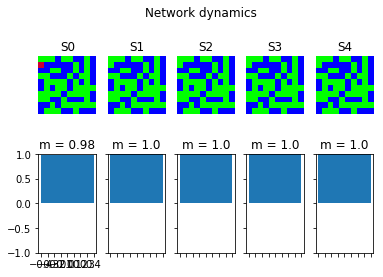

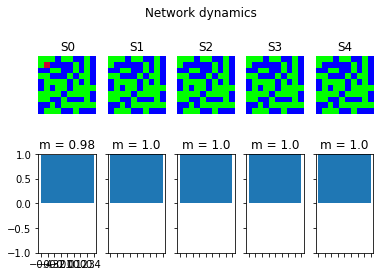

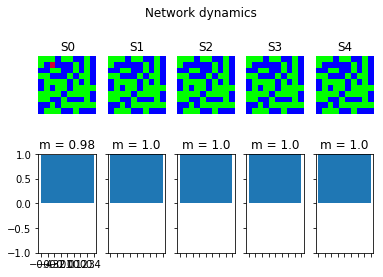

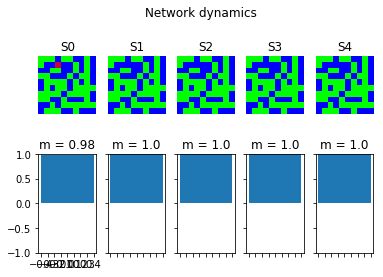

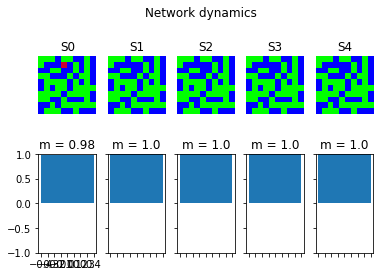

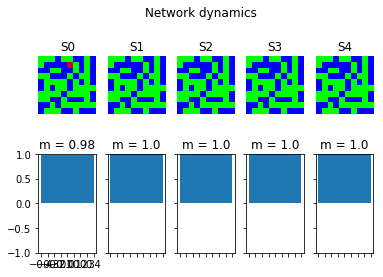

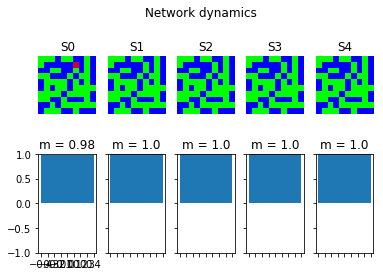

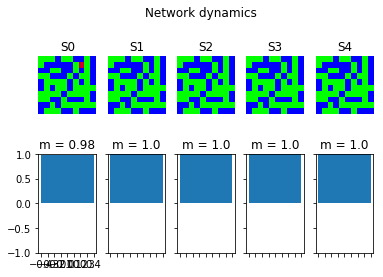

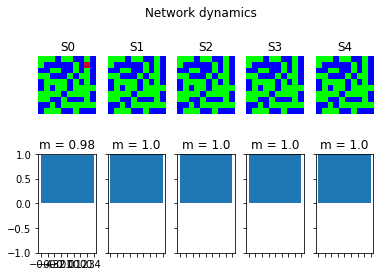

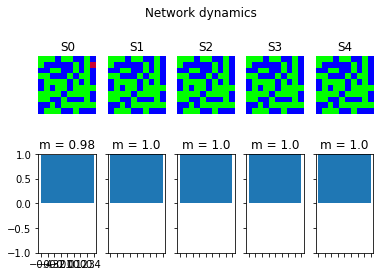

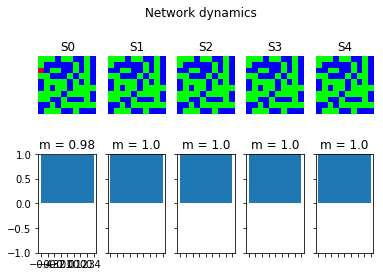

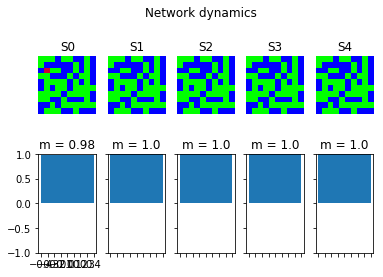

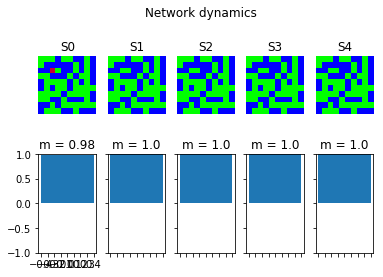

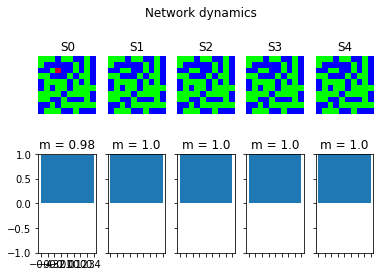

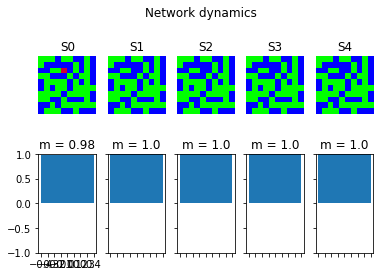

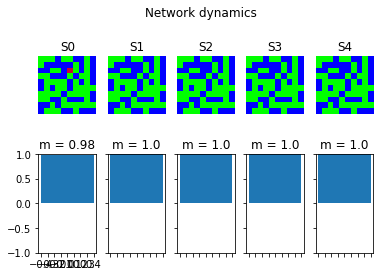

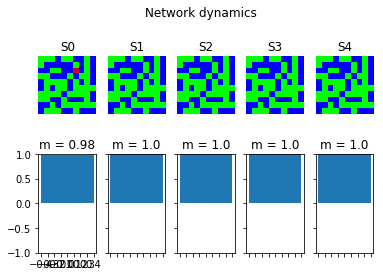

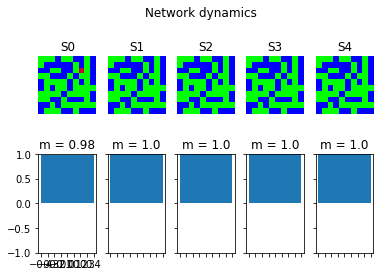

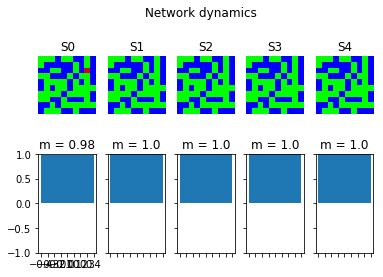

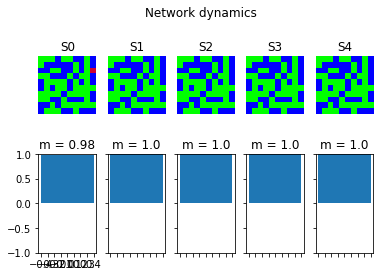

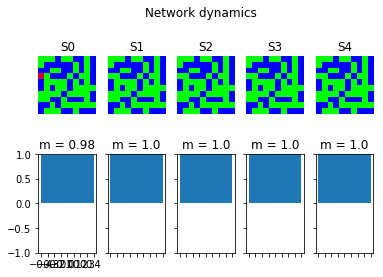

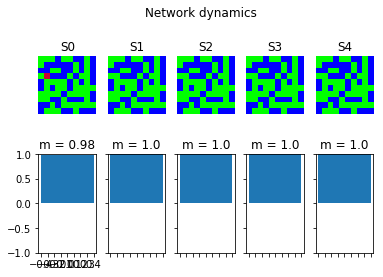

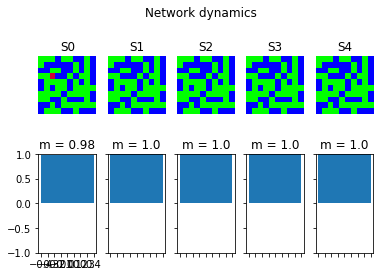

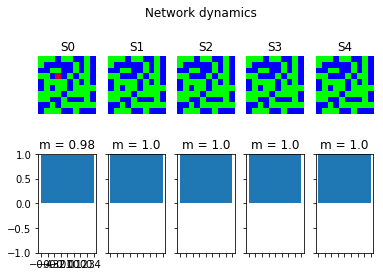

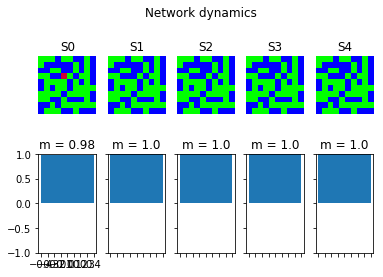

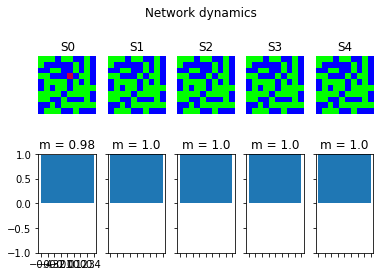

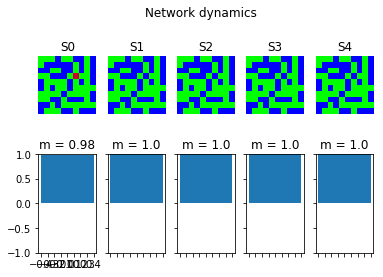

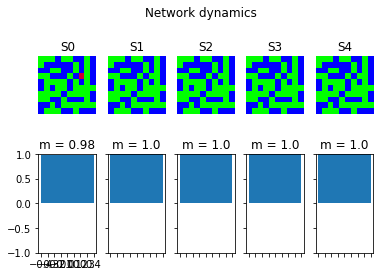

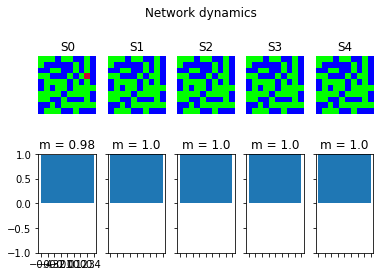

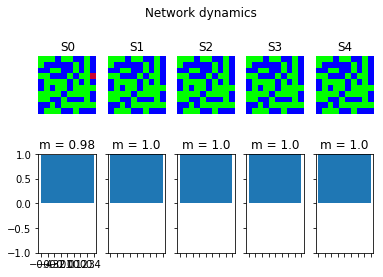

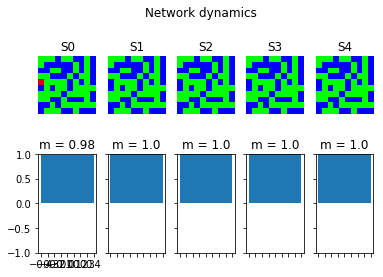

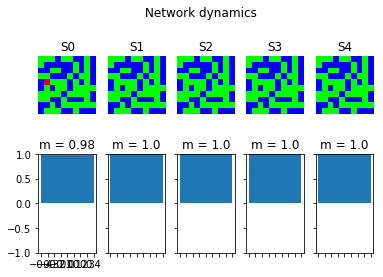

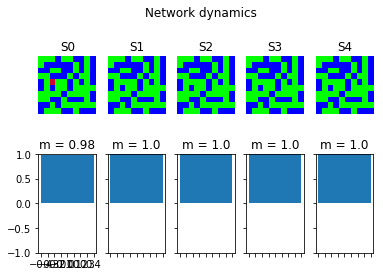

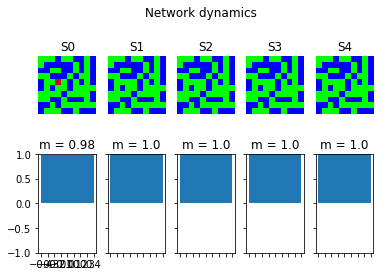

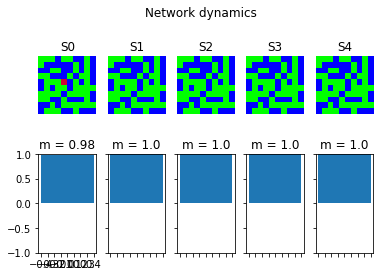

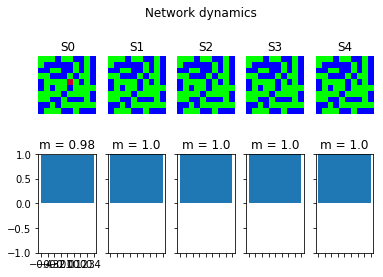

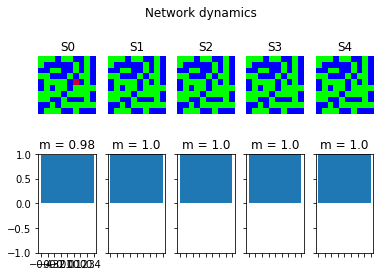

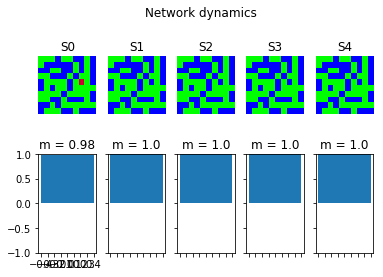

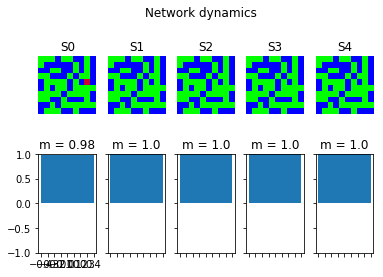

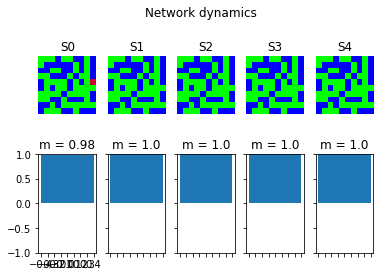

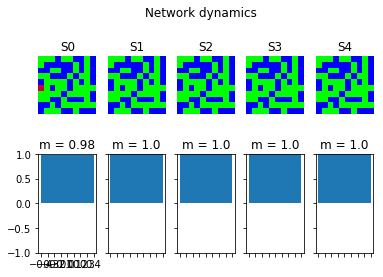

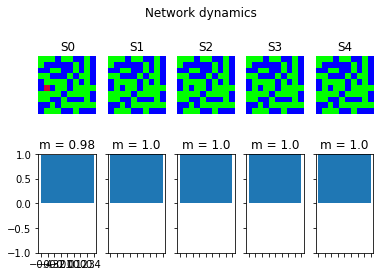

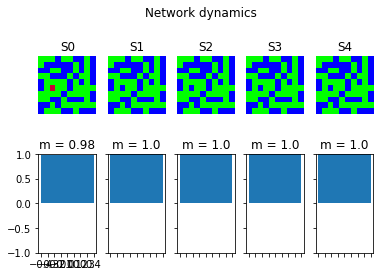

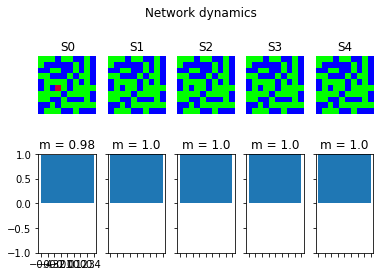

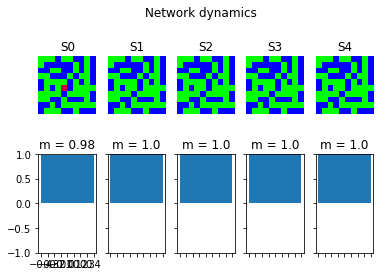

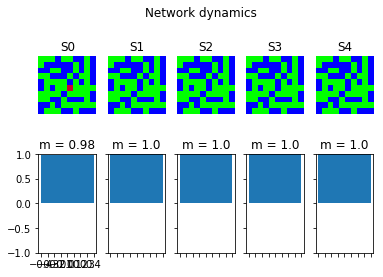

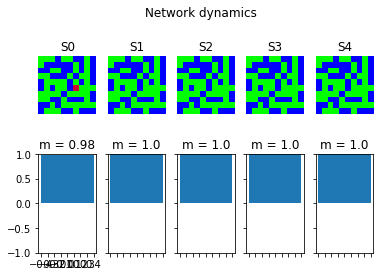

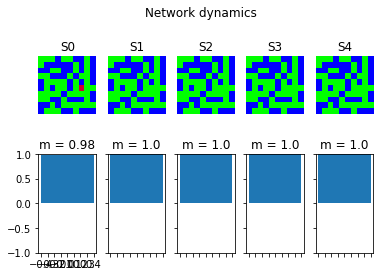

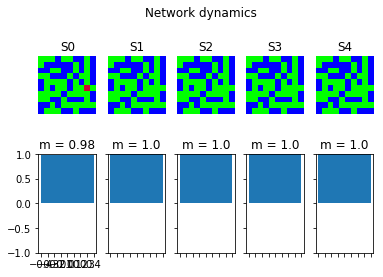

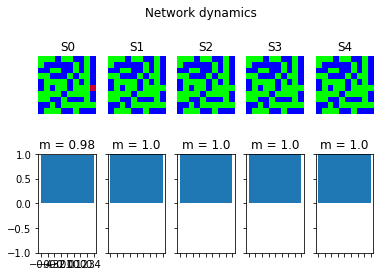

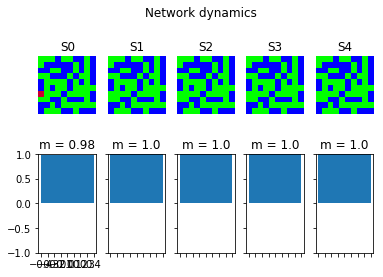

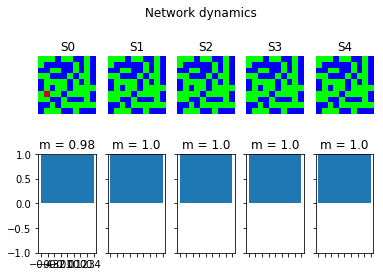

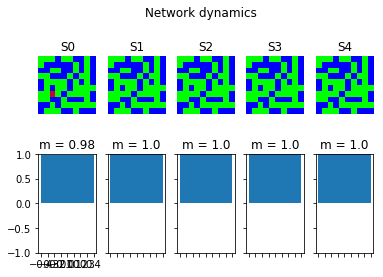

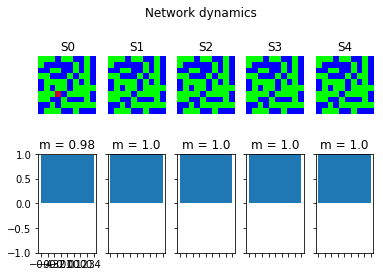

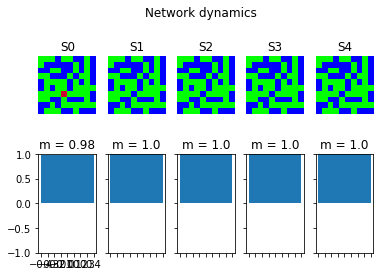

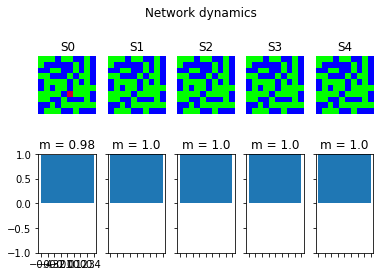

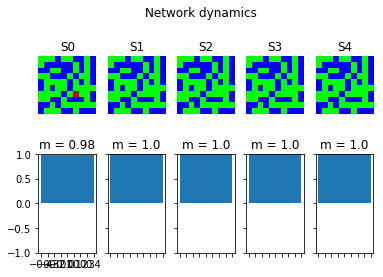

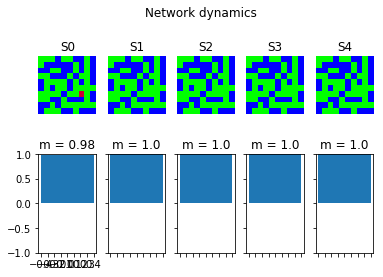

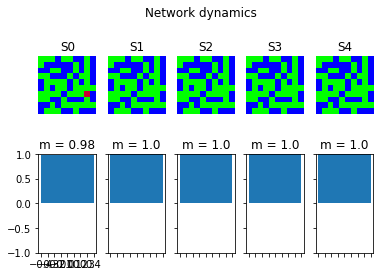

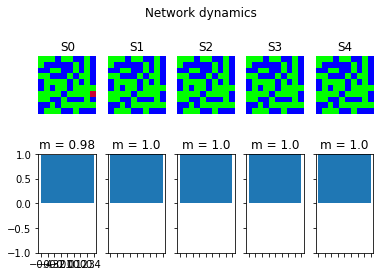

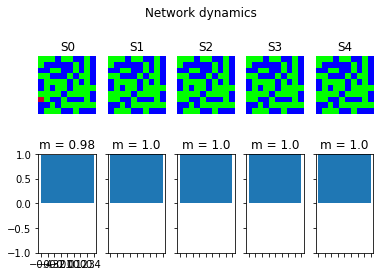

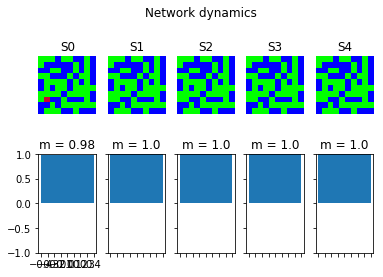

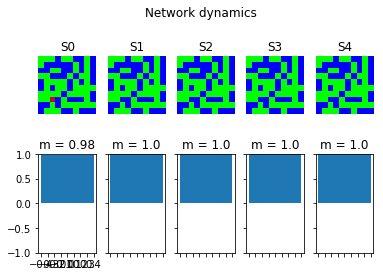

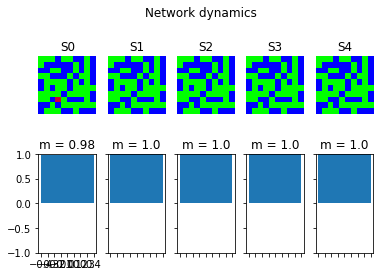

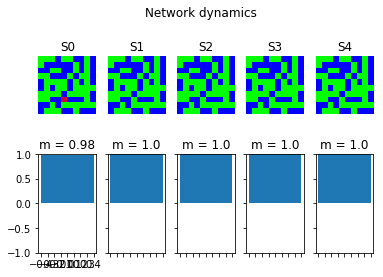

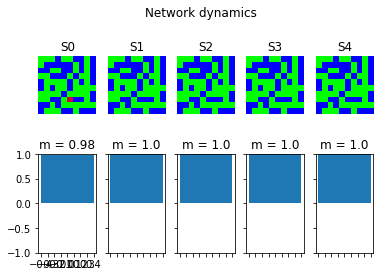

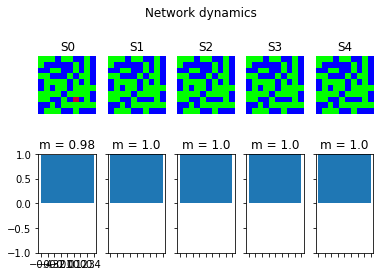

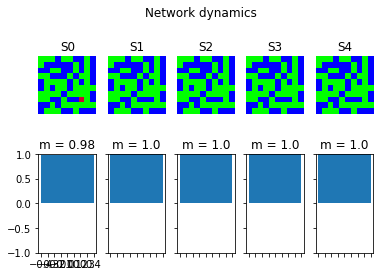

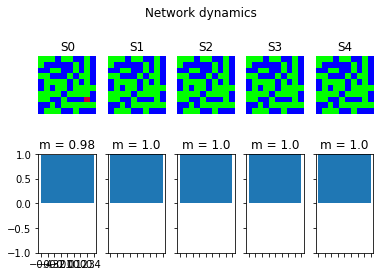

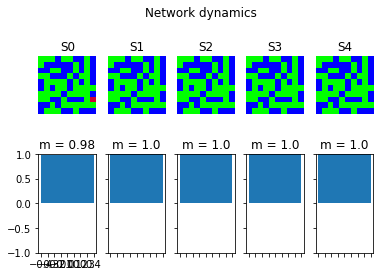

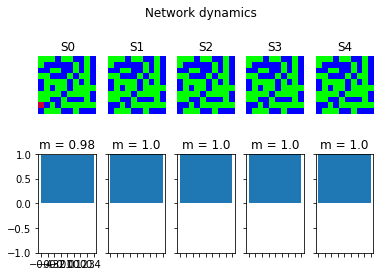

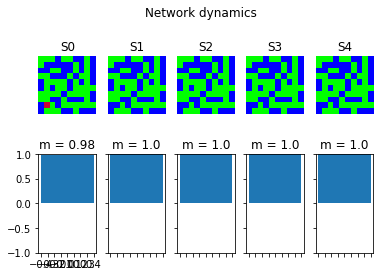

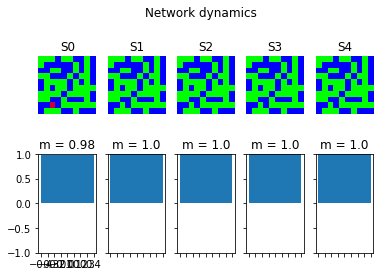

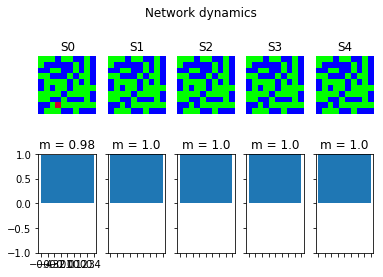

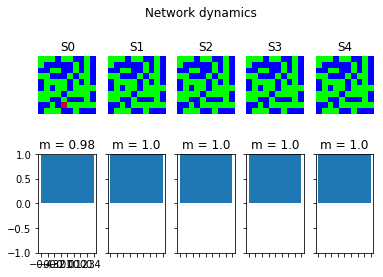

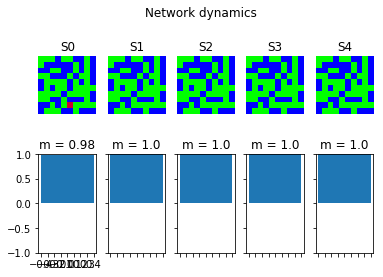

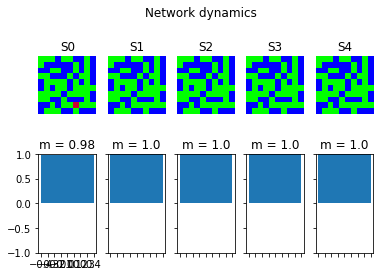

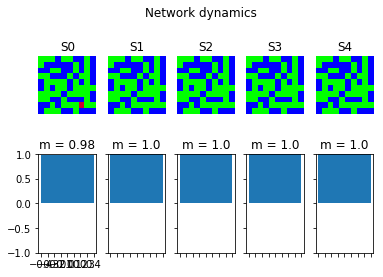

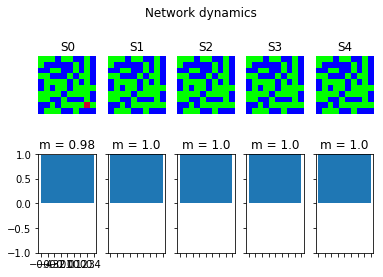

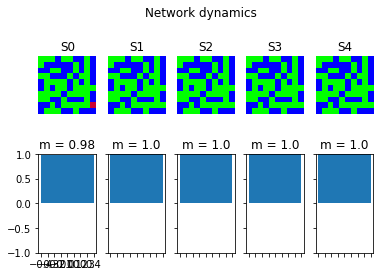

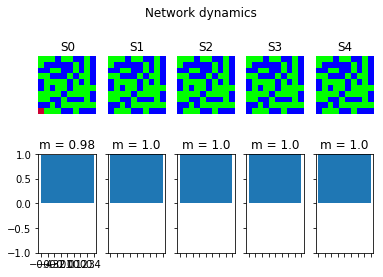

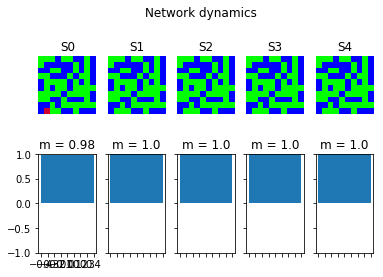

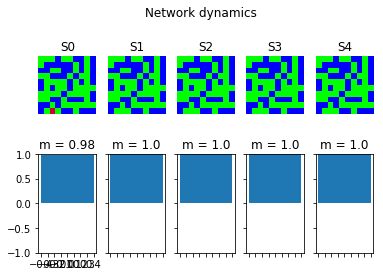

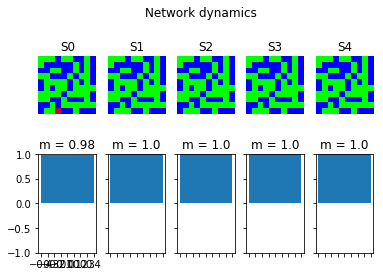

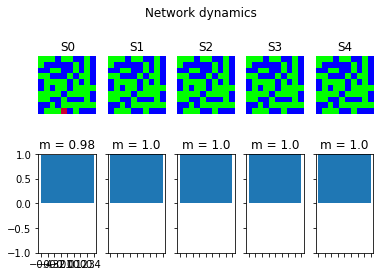

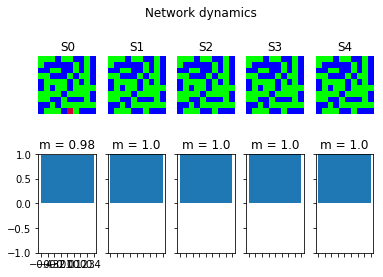

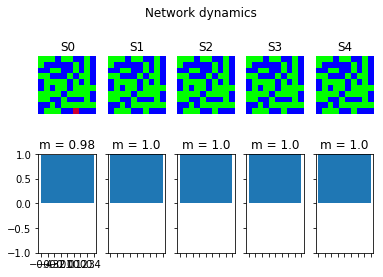

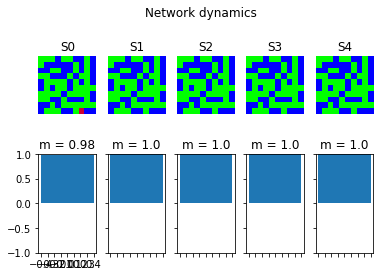

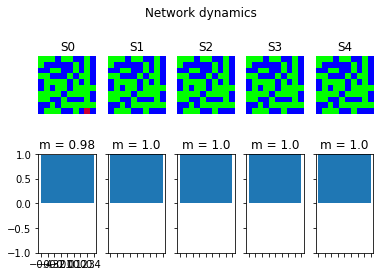

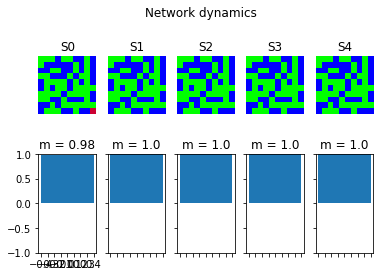

In [21]:
# Function to flip one neuron
def flip_idx(template, idx):
    """
    makes a copy of the template pattern and flips the idx-th state.
    Args:
        template:
        idx:
    Returns:
        a new pattern
    """
    linear_template = template.flatten()
    linear_template[idx] = -linear_template[idx]
    return linear_template.reshape(template.shape) 

s_0 = summed_initial_state

# Flip all neurons one after the other
for i in range(0, pattern_size**2):
    
    s_0_flipped = flip_idx(s_0, i)
    # initialize network state
    hopfield_net_energy_sum.set_state_from_pattern(s_0_flipped)
    # from this initial state, let the network dynamics evolve.
    states_sum = hopfield_net_energy_sum.run_with_monitoring(nr_steps=4)
    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = factory.reshape_patterns(states_sum)
    # plot the states of the network
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, [s_0], reference_idx=0, suptitle="Network dynamics")


    

3 - What can you tell about the stability of $S_0$? Briefly comment (max 5 lines). 

***Hint:*** For help, refer to the pdf on associative memory on the MOODLE (https://moodle.epfl.ch/pluginfile.php/1091071/mod_resource/content/0/Lecture5/Hertz_Hopfield.pdf).

#### [6 points]

The stability condition for $S_0$ is statisfied. Indeed for all 100 states (with a different neuron flipped from $S_0$) the network converges towards the $S_0$ pattern. It can be shown that a linear combination of an odd number of stored patterns is stable (it is a local minima). This is proven in chapter 2 of "Cognitive Modeling" (https://moodle.epfl.ch/pluginfile.php/1091071/mod_resource/content/0/Lecture5/Hertz_Hopfield.pdf). This can also be seen in question 8.7.4.1, the initial state does not evolve towards other states and the energy associated to this state is a local minima.

## 8.7.5 Question.
Does your argumentation above hold in the case of $S_0 = sgn(\sum_{\mu}^2 \xi^{\mu})$? Why? (max 3 lines)
#### [3 points]

With an even number of patterns (for example 2), the sign of the sum can be 0 but can only be +/- 1 values. So the stability condition of $S_0$ is only valid with a linear combination of an odd number of stored patterns.

## 8.7.6 Exercise.
Use now the stochastic neuron with asynchronous update you implemented in 8.6.4. Initialize the network with the state $S_0 = sgn(\sum_{\mu}^3 \xi^{\mu})$. For $\beta$ varying in $\beta\in \left[1,2,8,10,100\right]$, plot the overlap of the network initialized with $S_0$ with each of the 3 stored patterns as a function of time. 

What do you observe? Comment on the stability of the spurious state $S_0$ in each case. (max 4 lines)

Parameters: network size = 10x10, number of rnd patterns = 3, on probability = 0.5, number of steps = 9.

*** Hint 1: *** Make 4 plots (or 1 plot with 4 subplots), one for each value of $\beta$.

*** Hint 2: *** You can use the function pattern_tools.compute_overlap_list (or pattern_tools.compute_overlap).
#### [5 + 4 points]

In [22]:
def _plot_list(axes_list, state_sequence, reference=None, title_pattern="S({0})", color_map="brg"):
    """
    For internal use.
    Plots all states S(t) or patterns P in state_sequence.
    If a (optional) reference pattern is provided, the patters are  plotted with differences highlighted

    Args:
        state_sequence: (list(numpy.ndarray))
        reference: (numpy.ndarray)
        title_pattern (str) pattern injecting index i
    """
    for i in range(len(state_sequence)):
        if reference is None:
            p = state_sequence[i]
        else:
            p = pattern_tools.get_pattern_diff(state_sequence[i], reference, diff_code=-0.2)
        axes_list[i].imshow(p, interpolation="nearest", cmap=color_map)
        axes_list[i].set_title(title_pattern.format(i))
        axes_list[i].axis("off")

        
'''
redefine plot_state_sequence_and_overlap() function for plots
'''        
def my_plot_state_sequence_and_overlap(state_sequence, pattern_list, reference_idx, color_map="brg", suptitle=None):
    """
    For each time point t ( = index of state_sequence), plots the sequence of states and the overlap
    between state(t) and each pattern.

    Args:
        state_sequence: (list(numpy.ndarray))
        pattern_list: (list(numpy.ndarray))
        reference_idx: (int) identifies the pattern in pattern_list for which wrong pixels are colored.
    """
    if reference_idx is None:
        reference_idx = 0
    reference = pattern_list[reference_idx]
    f, ax = plt.subplots(1, len(state_sequence))
    if len(state_sequence) == 1:
        ax = [ax]
    _plot_list(ax, state_sequence, reference, "S{0}", color_map)
    for i in range(len(state_sequence)):
        overlap_list = pattern_tools.compute_overlap_list(state_sequence[i], pattern_list)
        #ax[1, i].bar(range(len(overlap_list)), overlap_list)
        #ax[1, i].set_title("m = {1}".format(i, round(overlap_list[reference_idx], 2)))
        #ax[1, i].set_ylim([-1, 1])
        #ax[1, i].get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))
        #if i > 0:  # show lables only for the first subplot
         #   ax[1, i].set_xticklabels([])
          #  ax[1, i].set_yticklabels([])
    if suptitle is not None:
        f.suptitle(suptitle)
    #plt.show()

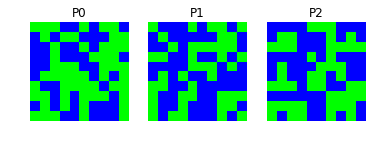

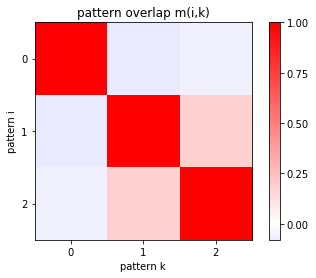

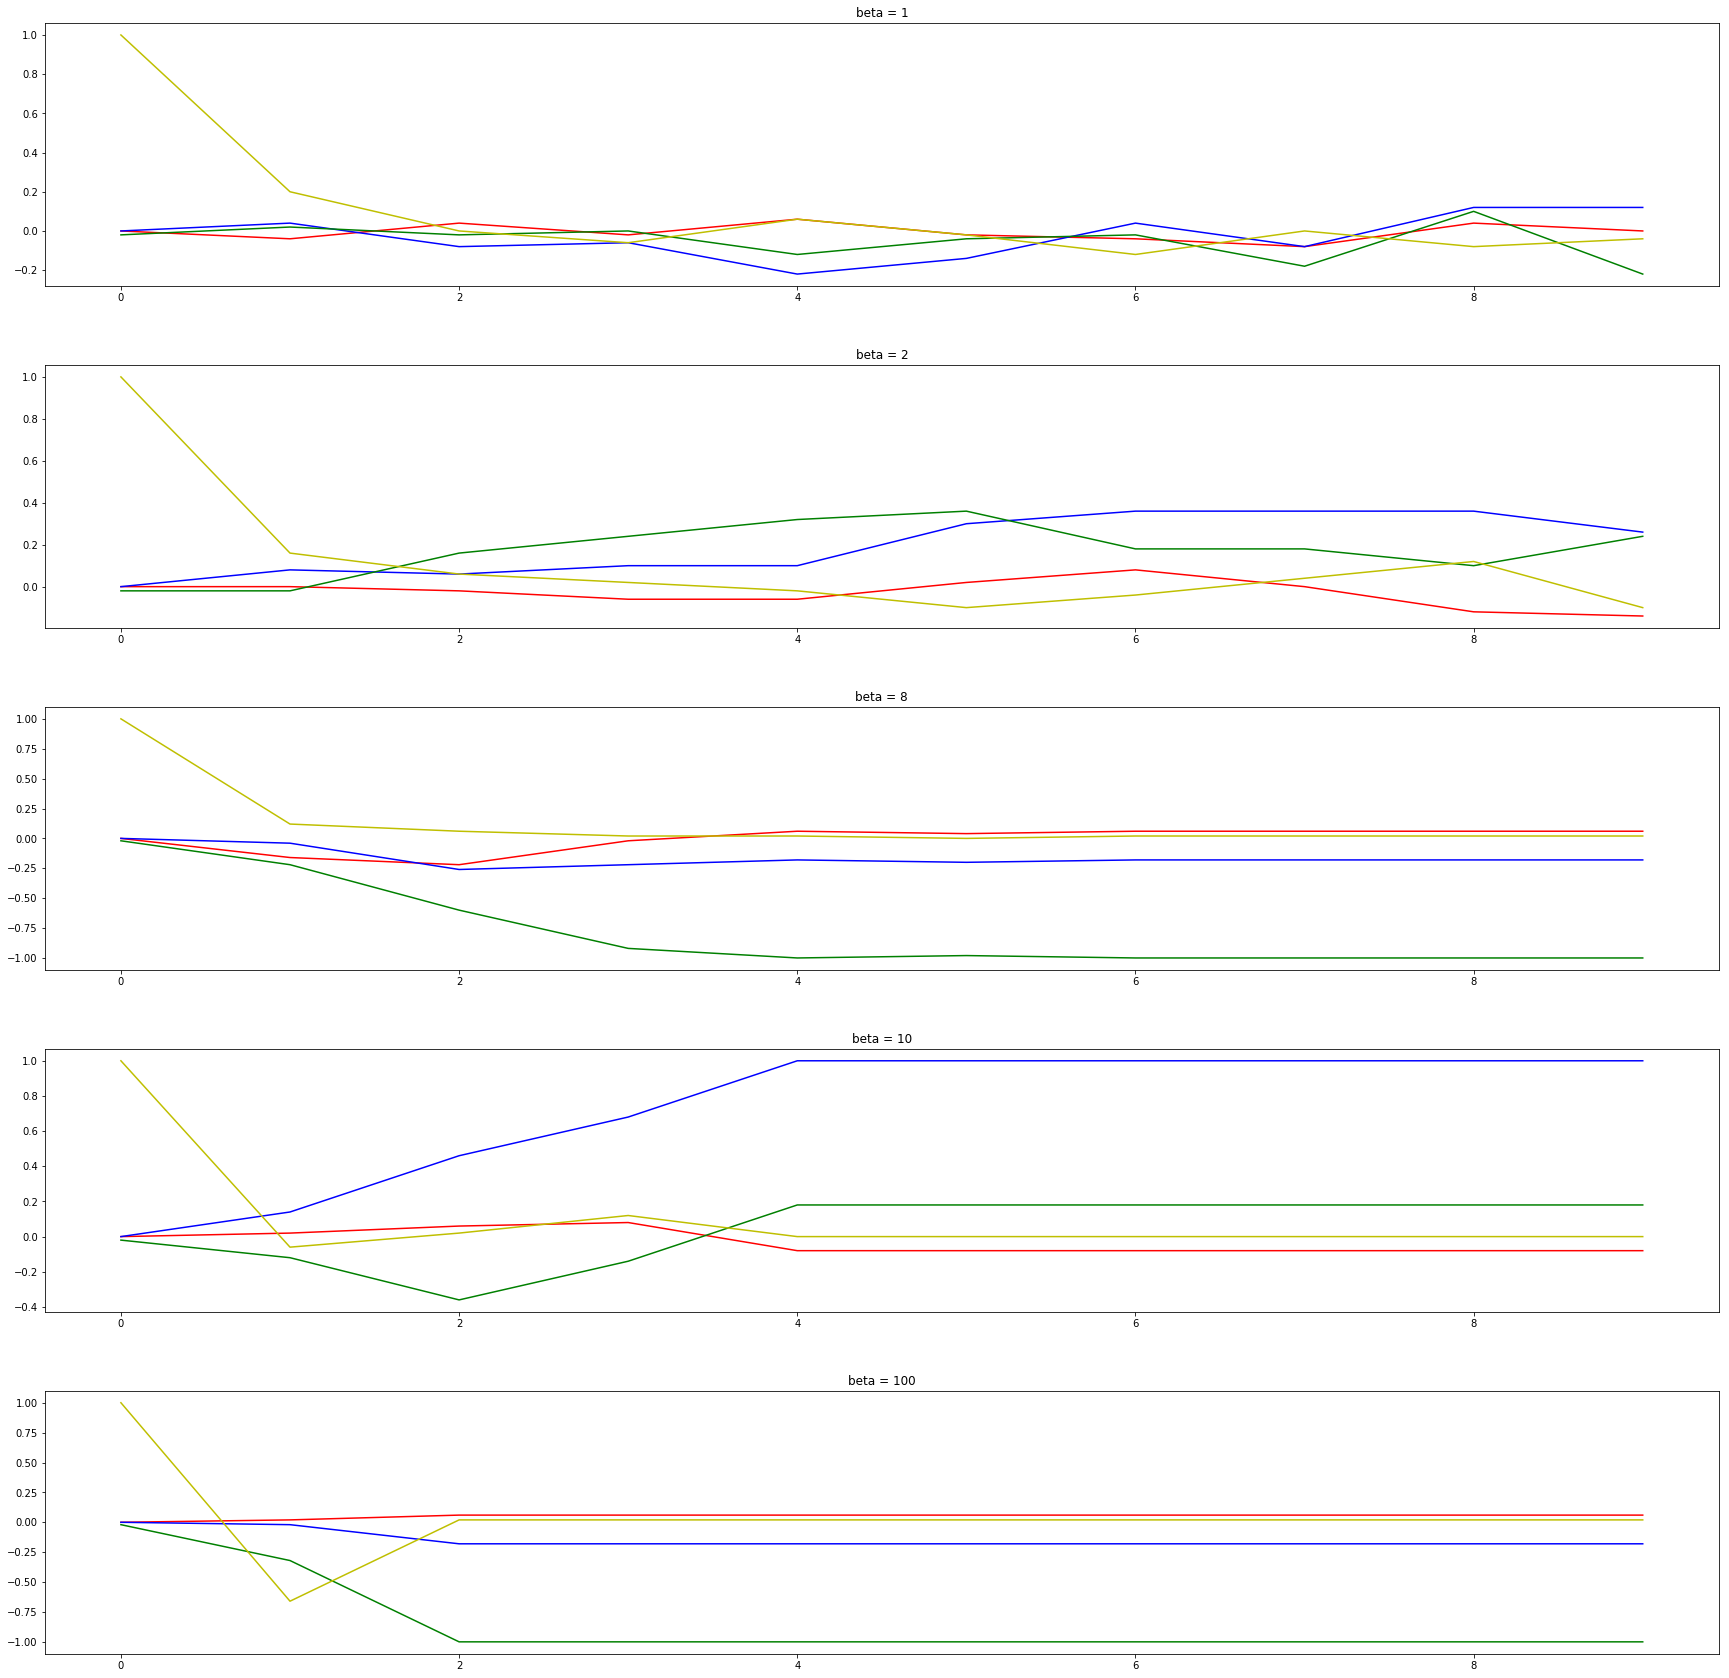

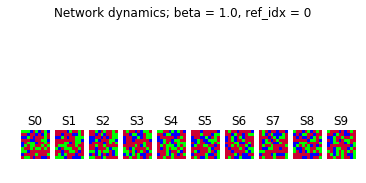

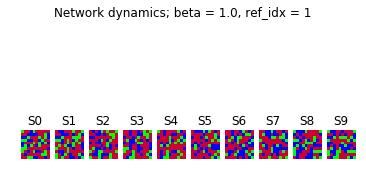

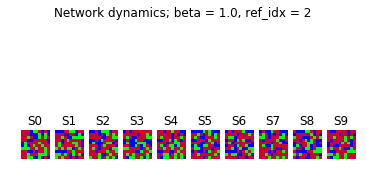

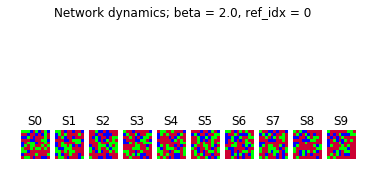

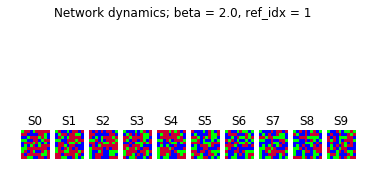

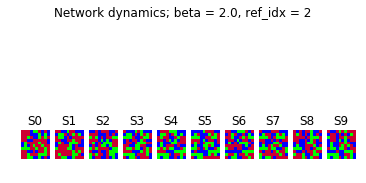

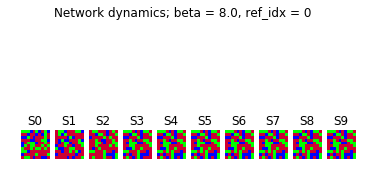

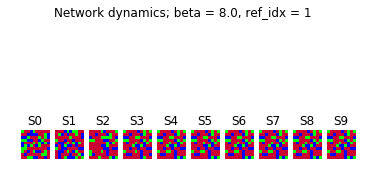

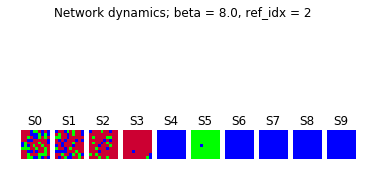

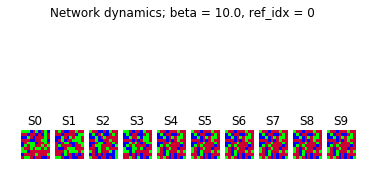

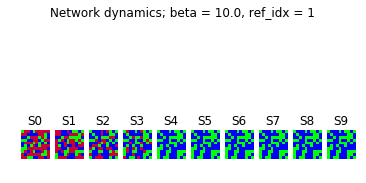

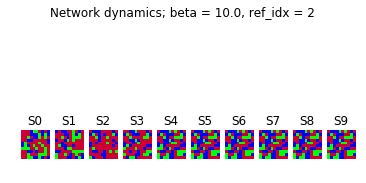

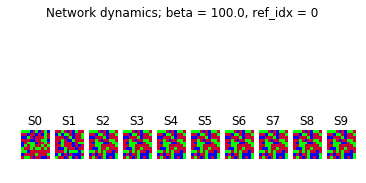

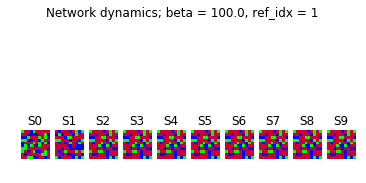

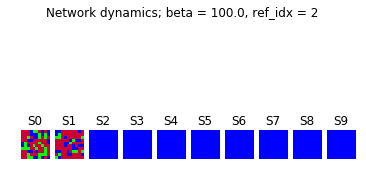

In [23]:
betas_sum = [1,2,8,10,100]
pattern_size = 10

hopfield_net_asynch_stoch_sum = network.HopfieldNetwork(nr_neurons= pattern_size**2)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create the pattern list
pattern_list_asynch_stoch_sum = []

# add random patterns to the list
pattern_list_asynch_stoch_sum.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list_asynch_stoch_sum)

# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list_asynch_stoch_sum)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net_asynch_stoch_sum.store_patterns(pattern_list_asynch_stoch_sum)

# create initial state (sign of sum of patterns)
summed_initial_state_stoch = np.sign(pattern_list_energy_sum[0]+pattern_list_energy_sum[1]+pattern_list_energy_sum[2])
f, aa = plt.subplots(len(betas_sum), 1, figsize=(30,30))

for j in range(0, len(betas_sum)):
    
    hopfield_net_asynch_stoch_sum.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=betas_sum[j]))
    hopfield_net_asynch_stoch_sum.set_state_from_pattern(summed_initial_state_stoch)

    # from this initial state, let the network dynamics evolve.
    states = hopfield_net_asynch_stoch_sum.run_with_monitoring(nr_steps=9)

    # let the network dynamics evolve
    states_as_patterns = factory.reshape_patterns(states)
    
    # compute overlap
    overlap_sum_1 = pattern_tools.compute_overlap_list(pattern_list_asynch_stoch_sum[0], states_as_patterns)
    overlap_sum_2 = pattern_tools.compute_overlap_list(pattern_list_asynch_stoch_sum[1], states_as_patterns)
    overlap_sum_3 = pattern_tools.compute_overlap_list(pattern_list_asynch_stoch_sum[2], states_as_patterns)
    overlap_sum_4 = pattern_tools.compute_overlap_list(summed_initial_state_stoch, states_as_patterns)

    
    # Plot
    my_plot_state_sequence_and_overlap(states_as_patterns, pattern_list_asynch_stoch_sum, reference_idx=0, suptitle="Network dynamics; beta = {0:.1f}, ref_idx = {1}".format(betas_sum[j], 0))
    my_plot_state_sequence_and_overlap(states_as_patterns, pattern_list_asynch_stoch_sum, reference_idx=1, suptitle="Network dynamics; beta = {0:.1f}, ref_idx = {1}".format(betas_sum[j], 1))
    my_plot_state_sequence_and_overlap(states_as_patterns, pattern_list_asynch_stoch_sum, reference_idx=2, suptitle="Network dynamics; beta = {0:.1f}, ref_idx = {1}".format(betas_sum[j], 2))
    aa[j].plot(np.arange(len(states_as_patterns)), overlap_sum_1, 'r', np.arange(len(states_as_patterns)), overlap_sum_2 , 'b', np.arange(len(states_as_patterns)), overlap_sum_3, 'g', np.arange(len(states_as_patterns)), overlap_sum_4, 'y')
    aa[j].set_title('beta = '+str(betas_sum[j]))
f.subplots_adjust(hspace=0.3)
plt.show()

Using the stochastic neuron with asynchronous update, the stability of $s_0$ is not satisfied: when initializing the network with $s_0$, the network will move away from it. 
On one hand, we observe that for small betas (1, 2) the network does not retrieve any stored pattern and have an unstable behavior. On the other hand, for larger betas (8, 10, 100) the network sometimes converges towards a stored pattern and sometimes converges to some other local minima. As beta increases, the number of iterations necessary for convergence decreases.